<a href="https://colab.research.google.com/github/firdevsturgut02/Fake-News-Detection-Dataset/blob/main/FakeNewsDetection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection using Machine Learning

### Importing Libraries

In [52]:
import pandas as pd  # Used for data manipulation and creating/managing DataFrames
import numpy as np  # Provides support for numerical computing and array operations
import seaborn as sns  # Used for statistical data visualization (e.g., heatmaps, distributions)
import matplotlib.pyplot as plt  # Provides tools for creating plots and visualizations
from sklearn.model_selection import train_test_split  # Splits the dataset into training and testing sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss  # Metrics for model evaluation
from sklearn.linear_model import LogisticRegression  # Implements the Logistic Regression model for classification
from sklearn.tree import DecisionTreeClassifier  # Implements the Decision Tree model for classification tasks
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Used for Random Forest and Gradient Boosting models.
from tabulate import tabulate  # For displaying tables in a clean format
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text data into numerical features using TF-IDF
from sklearn.feature_extraction.text import CountVectorizer  # Converts text data into numerical features using word counts
import re  # Provides regular expressions for pattern matching and text preprocessing
import string  # Useful for string operations, such as removing punctuation

### Loading Datasets

In [53]:
data_fake = pd.read_csv("Fake.csv")  # Fake news dataset
data_true = pd.read_csv("True.csv")  # True news dataset

### Data Preview

In [54]:
data_fake.head() #Displaying the first 5 rows of fake news dataset

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [55]:
data_true.head() #Display the first 5 rows of true news dataset

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Adding Class Labels

In [56]:
data_fake["class"] = 0  # For fake news
data_true["class"] = 1  # For true news

In [57]:
data_fake.head() #Display fake news dataset with new class column

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [58]:
data_true.head() #Display true news dataset with new class column

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


### Checking Dataset Shapes

In [59]:
data_fake.shape # Display the shape (rows, columns) of fake news dataset

(23481, 5)

In [60]:
data_true.shape # Display the shape (rows, columns) of true news dataset

(21417, 5)

### Manual Testing for Both the Dataset

#### Removing the last 10 rows for manual testing  

In [61]:
# Extracting the last 10 rows from the fake news dataset for manual testing
data_fake_manual_testing = data_fake.tail(10)

# Removing the last 10 rows from the fake news dataset
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis=0, inplace=True)

In [62]:
data_fake.shape

(23471, 5)

In [63]:
# Extracting the last 10 rows from the true news dataset for manual testing
data_true_manual_testing = data_true.tail(10)

# Removing the last 10 rows from the true news dataset
for i in range(21416, 21406, -1):
    data_true.drop([i], axis=0, inplace=True)

In [64]:
data_true.shape

(21407, 5)

#### Adding class labels for manual testing datasets

In [65]:
data_fake_manual_testing.loc[:, "class"] = 0  # For fake news
data_true_manual_testing.loc[:, "class"] = 1  # For true news

In [66]:
# Display the first 10 rows of the fake news manual testing dataset
data_fake_manual_testing

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [67]:
# Display the first 10 rows of the true news manual testing dataset
data_true_manual_testing

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [68]:
# Combining the fake and true news datasets
manual_testing_data = pd.concat([data_fake_manual_testing, data_true_manual_testing])

# Saving the combined dataset to manual_testing.csv
manual_testing_data.to_csv('manual_testing.csv', index=False)

### Merging Both the Dataset

In [69]:
data_merge = pd.concat([data_fake, data_true], axis =0 )
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### Dropping unnecessary columns

In [70]:
data = data_merge.drop(["title", "subject", "date"], axis=1)
data.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


### Checking for missing values

In [71]:
print(data.isnull().sum())

text     0
class    0
dtype: int64


There is no missing values in dataset.

### Shuffling the dataset and resetting the index

In [72]:
# Shuffling the rows of the dataset randomly
dataframe_shuffled = data.sample(frac=1)

# Displaying the first few rows of the shuffled dataframe
dataframe_shuffled.head(10)

,text,class
21111,Anyone up for a European vacation? How about s...,0
2778,It s always interesting when people decide to ...,0
12840,MOSCOW (Reuters) - Russian Foreign Minister Se...,1
13457,ROME/ANKARA (Reuters) - China is financing bil...,1
7332,Always eager to use a tragedy to erode the Con...,0
13847,CAIRO (Reuters) - Gunmen who attacked a mosque...,1
10512,"Based Stickman, aka Kyle Chapman became famous...",0
19422,Michelle Obama told Oprah Winfrey in her final...,0
9405,It s pretty common knowledge for anyone s who ...,0
17564,VIENNA (Reuters) - Austria s parliamentary ele...,1


In [73]:
# Resetting the index of the shuffled dataframe
dataframe_shuffled.reset_index(drop=True, inplace=True)

# Displaying the first few rows of the dataframe after resetting the index
dataframe_shuffled.head(10)

,text,class
0,Anyone up for a European vacation? How about s...,0
1,It s always interesting when people decide to ...,0
2,MOSCOW (Reuters) - Russian Foreign Minister Se...,1
3,ROME/ANKARA (Reuters) - China is financing bil...,1
4,Always eager to use a tragedy to erode the Con...,0
5,CAIRO (Reuters) - Gunmen who attacked a mosque...,1
6,"Based Stickman, aka Kyle Chapman became famous...",0
7,Michelle Obama told Oprah Winfrey in her final...,0
8,It s pretty common knowledge for anyone s who ...,0
9,VIENNA (Reuters) - Austria s parliamentary ele...,1


### Text Cleaning Function

In [74]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove content inside square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation marks
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

# Applying the cleaning function
data['text'] = data['text'].apply(clean_text)

### Splitting the Data into Training, Validation, and Test Sets

In [75]:
# Features and labels
x = data['text']  # Features (text data)
y = data['class']  # Labels (class)

# Creating training, validation, and test sets
x_train_temp, x_test, y_train_temp, y_test = train_test_split(
    x, y, test_size=0.15, random_state=42, stratify=y
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train_temp, y_train_temp, test_size=0.1765, random_state=42, stratify=y_train_temp
)

# Checking the sizes of the training, validation, and test sets
print("Training set size:", len(x_train))
print("Validation set size:", len(x_val))
print("Testing set size:", len(x_test))

Training set size: 31413
Validation set size: 6733
Testing set size: 6732


### TF-IDF Vectorization for Text Data

In [76]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 1), stop_words='english')

# Transform the training data into TF-IDF vectors
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Transform the validation and test data using the same vectorizer
x_val_tfidf = tfidf_vectorizer.transform(x_val)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Check the shapes of the TF-IDF matrices
print("TF-IDF matrix shape (Training):", x_train_tfidf.shape)
print("TF-IDF matrix shape (Validation):", x_val_tfidf.shape)
print("TF-IDF matrix shape (Testing):", x_test_tfidf.shape)

TF-IDF matrix shape (Training): (31413, 1000)
TF-IDF matrix shape (Validation): (6733, 1000)
TF-IDF matrix shape (Testing): (6732, 1000)


### Machine Learning Models

#### Logistic Regression

In [77]:
# Logistic Regression Model
logistic_model = LogisticRegression(random_state=42, n_jobs=-1)
logistic_model.fit(x_train_tfidf, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [78]:
# Predictions for Logistic Regression
y_train_pred = logistic_model.predict(x_train_tfidf)
y_val_pred = logistic_model.predict(x_val_tfidf)
y_test_pred = logistic_model.predict(x_test_tfidf)

# Accuracy Metrics for Logistic Regression
train_accuracy_lr = accuracy_score(y_train, y_train_pred)
val_accuracy_lr = accuracy_score(y_val, y_val_pred)
test_accuracy_lr = accuracy_score(y_test, y_test_pred)

print("Logistic Regression - Training Accuracy:", train_accuracy_lr)
print("Logistic Regression - Validation Accuracy:", val_accuracy_lr)
print("Logistic Regression - Test Accuracy:", test_accuracy_lr)

Logistic Regression - Training Accuracy: 0.9871709164995384
Logistic Regression - Validation Accuracy: 0.9823258577157286
Logistic Regression - Test Accuracy: 0.9848484848484849


In [79]:
# Probabilities for Logistic Regression (needed for log_loss)
y_train_pred_proba_lr = logistic_model.predict_proba(x_train_tfidf)
y_val_pred_proba_lr = logistic_model.predict_proba(x_val_tfidf)
y_test_pred_proba_lr = logistic_model.predict_proba(x_test_tfidf)

# Loss Metrics for Logistic Regression
train_loss_lr = log_loss(y_train, y_train_pred_proba_lr)
val_loss_lr = log_loss(y_val, y_val_pred_proba_lr)
test_loss_lr = log_loss(y_test, y_test_pred_proba_lr)

# Print Loss Metrics for Logistic Regression
print("Logistic Regression - Training Loss:", train_loss_lr)
print("Logistic Regression - Validation Loss:", val_loss_lr)
print("Logistic Regression - Test Loss:", test_loss_lr)

Logistic Regression - Training Loss: 0.06695012562609895
Logistic Regression - Validation Loss: 0.07570294186773502
Logistic Regression - Test Loss: 0.07093205293576722


In [80]:
# Classification Report for Logistic Regression
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_val, y_val_pred))


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3521
           1       0.98      0.98      0.98      3212

    accuracy                           0.98      6733
   macro avg       0.98      0.98      0.98      6733
weighted avg       0.98      0.98      0.98      6733



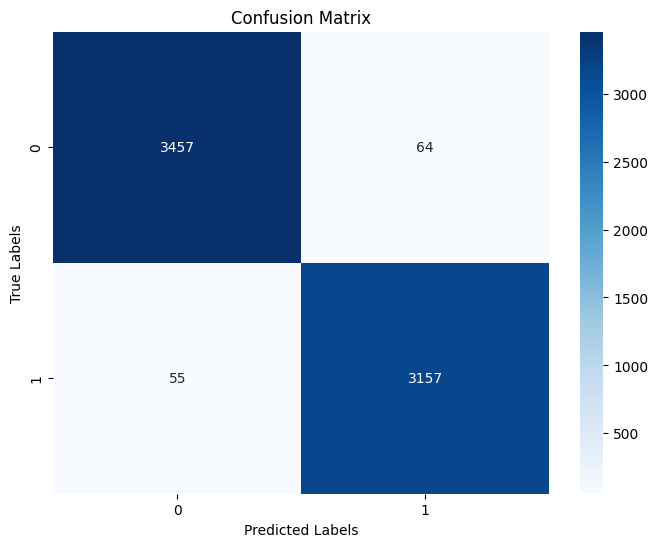

In [81]:
# Display the Confusion Matrix
cm_lr = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_val), yticklabels=set(y_val))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Decision Tree

In [82]:
# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
# Predictions for Decision Tree
y_train_pred = decision_tree_model.predict(x_train_tfidf)
y_val_pred = decision_tree_model.predict(x_val_tfidf)
y_test_pred = decision_tree_model.predict(x_test_tfidf)

# Accuracy Metrics for Decision Tree
train_accuracy_dt = accuracy_score(y_train, y_train_pred)
val_accuracy_dt = accuracy_score(y_val, y_val_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)

print("Decision Tree - Training Accuracy:", train_accuracy_dt)
print("Decision Tree - Validation Accuracy:", val_accuracy_dt)
print("Decision Tree - Test Accuracy:", test_accuracy_dt)

Decision Tree - Training Accuracy: 1.0
Decision Tree - Validation Accuracy: 0.9952472894697757
Decision Tree - Test Accuracy: 0.994058229352347


In [84]:
# Probabilities for Decision Tree (needed for log_loss)
y_train_pred_proba_dt = decision_tree_model.predict_proba(x_train_tfidf)
y_val_pred_proba_dt = decision_tree_model.predict_proba(x_val_tfidf)
y_test_pred_proba_dt = decision_tree_model.predict_proba(x_test_tfidf)

# Loss Metrics for Decision Tree
train_loss_dt = log_loss(y_train, y_train_pred_proba_dt)
val_loss_dt = log_loss(y_val, y_val_pred_proba_dt)
test_loss_dt = log_loss(y_test, y_test_pred_proba_dt)

# Print Loss Metrics for Decision Tree
print("Decision Tree - Training Loss:", train_loss_dt)
print("Decision Tree - Validation Loss:", val_loss_dt)
print("Decision Tree - Test Loss:", test_loss_dt)

Decision Tree - Training Loss: 2.2204460492503136e-16
Decision Tree - Validation Loss: 0.17130505101021093
Decision Tree - Test Loss: 0.21416312174163513


In [85]:
# Classification Report for Decision Tree
print("\nClassification Report - Decision Tree:")
print(classification_report(y_val, y_val_pred))


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3521
           1       0.99      1.00      1.00      3212

    accuracy                           1.00      6733
   macro avg       1.00      1.00      1.00      6733
weighted avg       1.00      1.00      1.00      6733



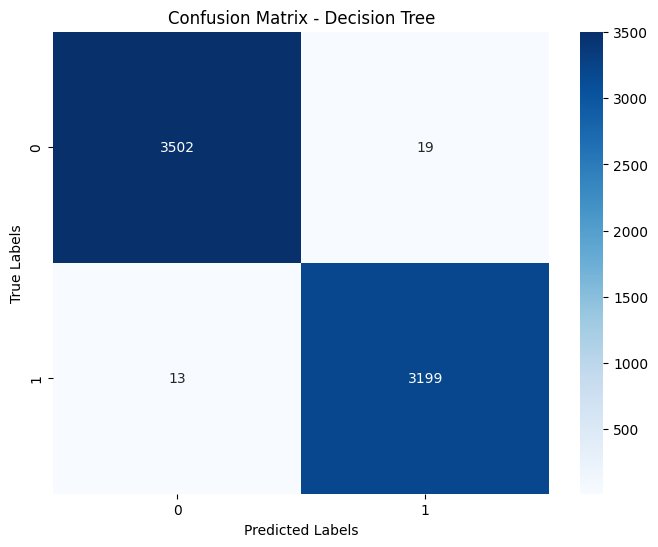

In [86]:
# Display the Confusion Matrix for Validation Set
cm_dt = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_val), yticklabels=set(y_val))
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Random Forest

In [87]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [88]:
# Predictions for Random Forest
y_train_pred_rf = rf_model.predict(x_train_tfidf)
y_val_pred_rf = rf_model.predict(x_val_tfidf)
y_test_pred_rf = rf_model.predict(x_test_tfidf)

# Accuracy Metrics for Random Forest
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest - Training Accuracy:", train_accuracy_rf)
print("Random Forest - Validation Accuracy:", val_accuracy_rf)
print("Random Forest - Test Accuracy:", test_accuracy_rf)

Random Forest - Training Accuracy: 1.0
Random Forest - Validation Accuracy: 0.9964354671023318
Random Forest - Test Accuracy: 0.9965834818775995


In [89]:
# Probabilities for Random Forest (needed for log_loss)
y_train_pred_proba_rf = rf_model.predict_proba(x_train_tfidf)
y_val_pred_proba_rf = rf_model.predict_proba(x_val_tfidf)
y_test_pred_proba_rf = rf_model.predict_proba(x_test_tfidf)

# Loss Metrics for Random Forest
train_loss_rf = log_loss(y_train, y_train_pred_proba_rf)
val_loss_rf = log_loss(y_val, y_val_pred_proba_rf)
test_loss_rf = log_loss(y_test, y_test_pred_proba_rf)

# Print Loss Metrics for Random Forest
print("Random Forest - Training Loss:", train_loss_rf)
print("Random Forest - Validation Loss:", val_loss_rf)
print("Random Forest - Test Loss:", test_loss_rf)

Random Forest - Training Loss: 0.02679092418867838
Random Forest - Validation Loss: 0.08369734976072507
Random Forest - Test Loss: 0.07731987898619158


In [90]:
# Classification Report for Random Forest
print("\nClassification Report - Random Forest:")
print(classification_report(y_val, y_val_pred_rf))


Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3521
           1       1.00      1.00      1.00      3212

    accuracy                           1.00      6733
   macro avg       1.00      1.00      1.00      6733
weighted avg       1.00      1.00      1.00      6733



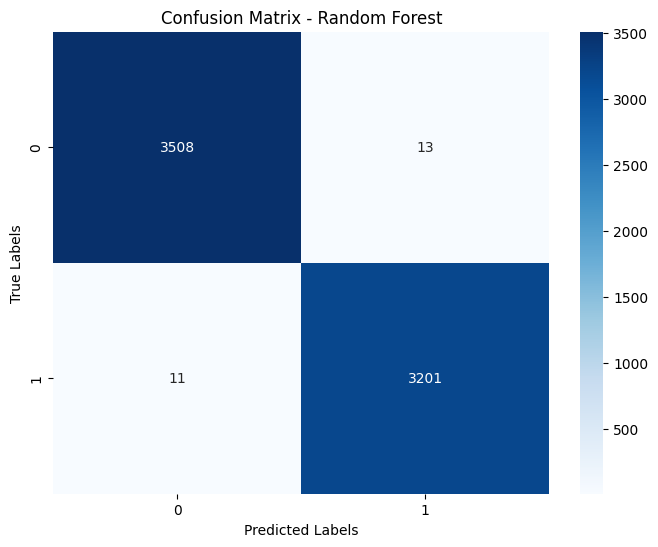

In [91]:
# Display the Confusion Matrix for Validation Set - Random Forest
cm_rf = confusion_matrix(y_val, y_val_pred_rf)  # Use predictions from the Random Forest model

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_val), yticklabels=set(y_val))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Gradient Boosting

In [92]:
# Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(x_train_tfidf, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [93]:
# Predictions for Gradient Boosting
y_train_pred_gb = gb_model.predict(x_train_tfidf)
y_val_pred_gb = gb_model.predict(x_val_tfidf)
y_test_pred_gb = gb_model.predict(x_test_tfidf)

# Accuracy Metrics for Gradient Boosting
train_accuracy_gb = accuracy_score(y_train, y_train_pred_gb)
val_accuracy_gb = accuracy_score(y_val, y_val_pred_gb)
test_accuracy_gb = accuracy_score(y_test, y_test_pred_gb)

print("Gradient Boosting - Training Accuracy:", train_accuracy_gb)
print("Gradient Boosting - Validation Accuracy:", val_accuracy_gb)
print("Gradient Boosting - Test Accuracy:", test_accuracy_gb)

Gradient Boosting - Training Accuracy: 0.9955114124725433
Gradient Boosting - Validation Accuracy: 0.9939105896331502
Gradient Boosting - Test Accuracy: 0.9946524064171123


In [94]:
# Probabilities for Gradient Boosting (needed for log_loss)
y_train_pred_proba_gb = gb_model.predict_proba(x_train_tfidf)
y_val_pred_proba_gb = gb_model.predict_proba(x_val_tfidf)
y_test_pred_proba_gb = gb_model.predict_proba(x_test_tfidf)

# Loss Metrics for Gradient Boosting
train_loss_gb = log_loss(y_train, y_train_pred_proba_gb)
val_loss_gb = log_loss(y_val, y_val_pred_proba_gb)
test_loss_gb = log_loss(y_test, y_test_pred_proba_gb)

# Print Loss Metrics for Gradient Boosting
print("Gradient Boosting - Training Loss:", train_loss_gb)
print("Gradient Boosting - Validation Loss:", val_loss_gb)
print("Gradient Boosting - Test Loss:", test_loss_gb)

Gradient Boosting - Training Loss: 0.022115992942947433
Gradient Boosting - Validation Loss: 0.029678505368730783
Gradient Boosting - Test Loss: 0.027143766835478395


In [95]:
# Classification Report for Gradient Boosting
print("\nClassification Report - Gradient Boosting:")
print(classification_report(y_val, y_val_pred_gb))


Classification Report - Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3521
           1       0.99      1.00      0.99      3212

    accuracy                           0.99      6733
   macro avg       0.99      0.99      0.99      6733
weighted avg       0.99      0.99      0.99      6733



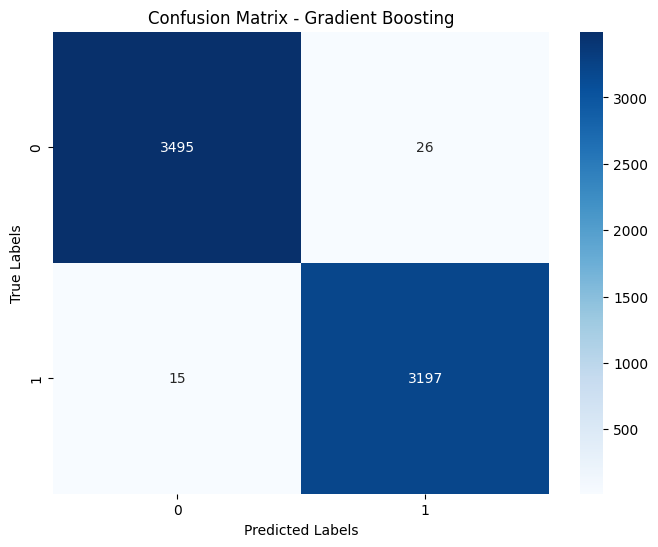

In [96]:
# Display the Confusion Matrix for Validation Set - Gradient Boosting
cm_gb = confusion_matrix(y_val, y_val_pred_gb)  # Use predictions from the Gradient Boosting model

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_val), yticklabels=set(y_val))
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Comparison of Model Accuracy Metrics

In [97]:
# Title for the comparison table
print("Comparison of Model Accuracy Metrics")

# Define model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Collect accuracy metrics (Training, Validation, and Test Accuracy) for each model
metrics = [
    [train_accuracy_lr, val_accuracy_lr, test_accuracy_lr],  # Logistic Regression
    [train_accuracy_dt, val_accuracy_dt, test_accuracy_dt],  # Decision Tree
    [train_accuracy_rf, val_accuracy_rf, test_accuracy_rf],  # Random Forest
    [train_accuracy_gb, val_accuracy_gb, test_accuracy_gb]   # Gradient Boosting
]

# Create a DataFrame to better organize and display the accuracy metrics
comparison_table = pd.DataFrame(metrics, columns=['Training Accuracy', 'Validation Accuracy', 'Test Accuracy'], index=model_names)

# Display the comparison table in a neat format using 'tabulate'
print(tabulate(comparison_table, headers='keys', tablefmt='fancy_grid'))

# print the table as a pandas DataFrame
print(comparison_table)

Comparison of Model Accuracy Metrics
╒═════════════════════╤═════════════════════╤═══════════════════════╤═════════════════╕
│                     │   Training Accuracy │   Validation Accuracy │   Test Accuracy │
╞═════════════════════╪═════════════════════╪═══════════════════════╪═════════════════╡
│ Logistic Regression │            0.987171 │              0.982326 │        0.984848 │
├─────────────────────┼─────────────────────┼───────────────────────┼─────────────────┤
│ Decision Tree       │            1        │              0.995247 │        0.994058 │
├─────────────────────┼─────────────────────┼───────────────────────┼─────────────────┤
│ Random Forest       │            1        │              0.996435 │        0.996583 │
├─────────────────────┼─────────────────────┼───────────────────────┼─────────────────┤
│ Gradient Boosting   │            0.995511 │              0.993911 │        0.994652 │
╘═════════════════════╧═════════════════════╧═══════════════════════╧══════════════

### Comparison of Model Loss Metrics

In [98]:
# Title for the comparison table
print("Comparison of Model Loss Metrics")

# Define model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Collect loss metrics (Training, Validation, and Test Loss) for each model
loss_metrics = [
    [train_loss_lr, val_loss_lr, test_loss_lr],  # Logistic Regression
    [train_loss_dt, val_loss_dt, test_loss_dt],  # Decision Tree
    [train_loss_rf, val_loss_rf, test_loss_rf],  # Random Forest
    [train_loss_gb, val_loss_gb, test_loss_gb]   # Gradient Boosting
]

# Create a DataFrame to better organize and display the loss metrics
loss_comparison_table = pd.DataFrame(loss_metrics, columns=['Training Loss', 'Validation Loss', 'Test Loss'], index=model_names)

# Display the loss comparison table in a neat format using 'tabulate'
print(tabulate(loss_comparison_table, headers='keys', tablefmt='fancy_grid'))

# Print the table as a pandas DataFrame
print(loss_comparison_table)

Comparison of Model Loss Metrics
╒═════════════════════╤═════════════════╤═══════════════════╤═════════════╕
│                     │   Training Loss │   Validation Loss │   Test Loss │
╞═════════════════════╪═════════════════╪═══════════════════╪═════════════╡
│ Logistic Regression │     0.0669501   │         0.0757029 │   0.0709321 │
├─────────────────────┼─────────────────┼───────────────────┼─────────────┤
│ Decision Tree       │     2.22045e-16 │         0.171305  │   0.214163  │
├─────────────────────┼─────────────────┼───────────────────┼─────────────┤
│ Random Forest       │     0.0267909   │         0.0836973 │   0.0773199 │
├─────────────────────┼─────────────────┼───────────────────┼─────────────┤
│ Gradient Boosting   │     0.022116    │         0.0296785 │   0.0271438 │
╘═════════════════════╧═════════════════╧═══════════════════╧═════════════╛
                     Training Loss  Validation Loss  Test Loss
Logistic Regression   6.695013e-02         0.075703   0.070932
Decis

### Model Testing

In [99]:
# Read the CSV file
df = pd.read_csv('manual_testing.csv')

# Filter rows where class value is 0
class_1_rows = df[df['class'] == 0]

# Print a text with class value 0)
print(class_1_rows.iloc[0]['text'])

21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, where the exchange was set to take place on Sunday.Three of the Iranians have d

In [100]:
# Read the CSV file
df = pd.read_csv('manual_testing.csv')

# Filter rows where class value is 0
class_1_rows = df[df['class'] == 1]

# Print a text with class value 0)
print(class_1_rows.iloc[0]['text'])

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of

In [ ]:
def output_label(n):
    if n == 0:
        return "Fake News"
    else:
        return "True News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text)  # Process the text
    new_x_test = new_def_test["text"]
    new_xv_test = tfidf_vectorizer.transform(new_x_test)  # Convert text to vectors

    # Predictions
    pred_LR = logistic_model.predict(new_xv_test)
    pred_DT = decision_tree_model.predict(new_xv_test)
    pred_RF = rf_model.predict(new_xv_test)
    pred_GB = gb_model.predict(new_xv_test)

    # Print predictions
    print("\nPredictions:")
    print("Logistic Regression: ", output_label(pred_LR[0]))
    print("Decision Tree: ", output_label(pred_DT[0]))
    print("Random Forest: ", output_label(pred_RF[0]))
    print("Gradient Boosting: ", output_label(pred_GB[0]))

# Get news text from the user and make predictions
news = str(input("Enter news text for testing: "))
manual_testing(news)

In [ ]:
# Get news text from the user and make predictions
news = str(input("Enter news text for testing: "))
manual_testing(news)

### Conclusion

In this project, titled "Fake News Detection with Machine Learning Models," I aimed to explore different machine learning models and evaluate their ability to detect fake news. First, I preprocessed the dataset by cleaning the text, handling missing values, and converting categorical data into numerical format. This step was crucial to ensure the data could be effectively used by machine learning models.

After preprocessing, I trained four different models: Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting. I evaluated the performance of each model using training, validation, and test accuracy. The Logistic Regression model gave good results, but its test accuracy was slightly lower compared to the other models. The Decision Tree model performed excellently during training but showed overfitting, leading to lower performance on the test set. The Random Forest model achieved the highest test accuracy at 99.66%, performing the best overall. Gradient Boosting also performed well, with results close to Random Forest.

In conclusion, the Random Forest model provided the best fake news detection performance. However, each model has its strengths and weaknesses, and the choice of the right model depends on the dataset and the specific needs of the project. This project helped me understand how the right model choice can significantly impact performance and how results can vary depending on the algorithm used.